In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  int64 
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price             185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Time              185950 non-null  object
 6   Purchase Address  185950 non-null  object
 7   City              185950 non-null  object
 8   Product Type      185950 non-null  object
dtypes: int64(2), object(7)
memory usage: 12.8+ MB
Missing values:
 Order ID            0
Product             0
Quantity Ordered    0
Price               0
Order Date          0
Time                0
Purchase Address    0
City                0
Product Type        0
dtype: int64


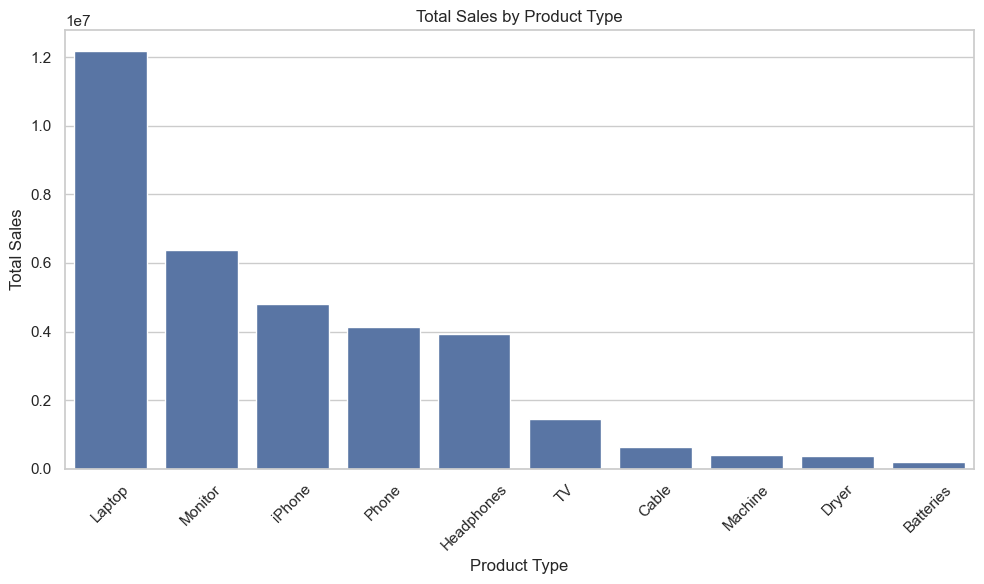

In [2]:
df = pd.read_csv('sales_product.csv')
df.head()
# Dataset Info
df.info()

# Summary statistics
df.describe()

# Missing values
print("Missing values:\n", df.isnull().sum())

# Clean 'Price' column and convert to float
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True).astype(float)

# Create 'Sales' column
df['Sales'] = df['Quantity Ordered'] * df['Price']

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
category_sales = df.groupby('Product Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  int64 
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price             185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Time              185950 non-null  object
 6   Purchase Address  185950 non-null  object
 7   City              185950 non-null  object
 8   Product Type      185950 non-null  object
dtypes: int64(2), object(7)
memory usage: 12.8+ MB
Missing values:
 Order ID            0
Product             0
Quantity Ordered    0
Price               0
Order Date          0
Time                0
Purchase Address    0
City                0
Product Type        0
dtype: int64


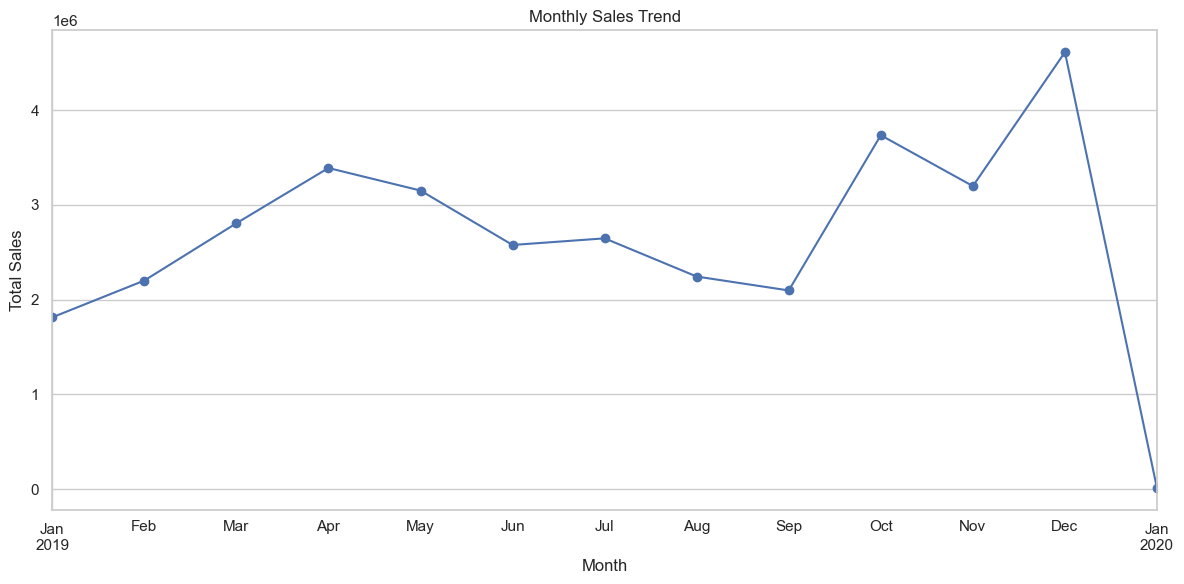

In [4]:
df = pd.read_csv('sales_product.csv')
df.head()
# Dataset Info
df.info()

# Summary statistics
df.describe()

# Missing values
print("Missing values:\n", df.isnull().sum())

# Clean 'Price' column and convert to float
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True).astype(float)

# Create 'Sales' column
df['Sales'] = df['Quantity Ordered'] * df['Price']

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
# Set date as index
df.set_index('Order Date', inplace=True)

# Resample by month
monthly_sales = df['Sales'].resample('ME').sum()

# Plot
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Reset index for future analysis
df.reset_index(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  int64 
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price             185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Time              185950 non-null  object
 6   Purchase Address  185950 non-null  object
 7   City              185950 non-null  object
 8   Product Type      185950 non-null  object
dtypes: int64(2), object(7)
memory usage: 12.8+ MB
Missing values:
 Order ID            0
Product             0
Quantity Ordered    0
Price               0
Order Date          0
Time                0
Purchase Address    0
City                0
Product Type        0
dtype: int64


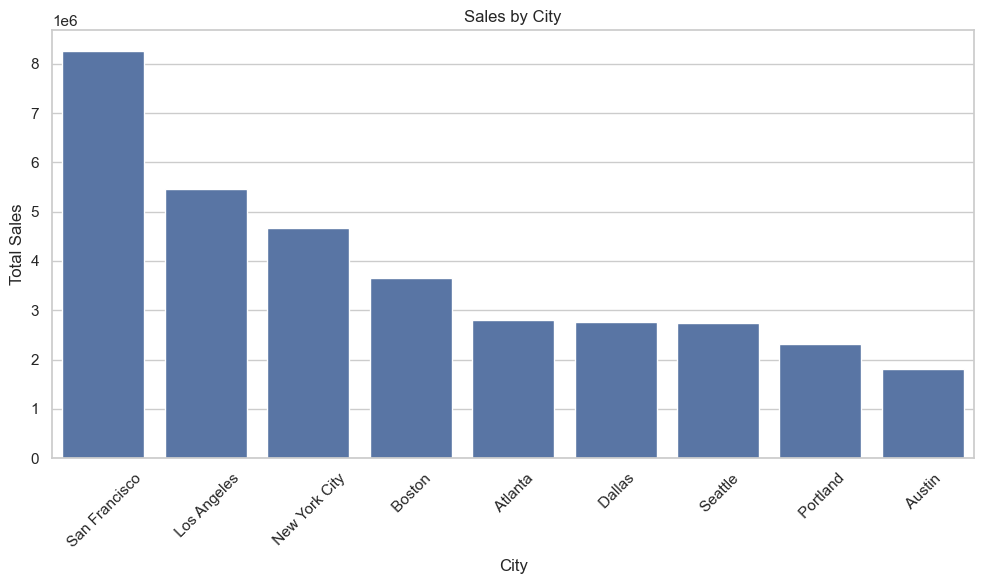

In [5]:
df = pd.read_csv('sales_product.csv')
df.head()
# Dataset Info
df.info()

# Summary statistics
df.describe()

# Missing values
print("Missing values:\n", df.isnull().sum())

# Clean 'Price' column and convert to float
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True).astype(float)

# Create 'Sales' column
df['Sales'] = df['Quantity Ordered'] * df['Price']

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=city_sales.index, y=city_sales.values)
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

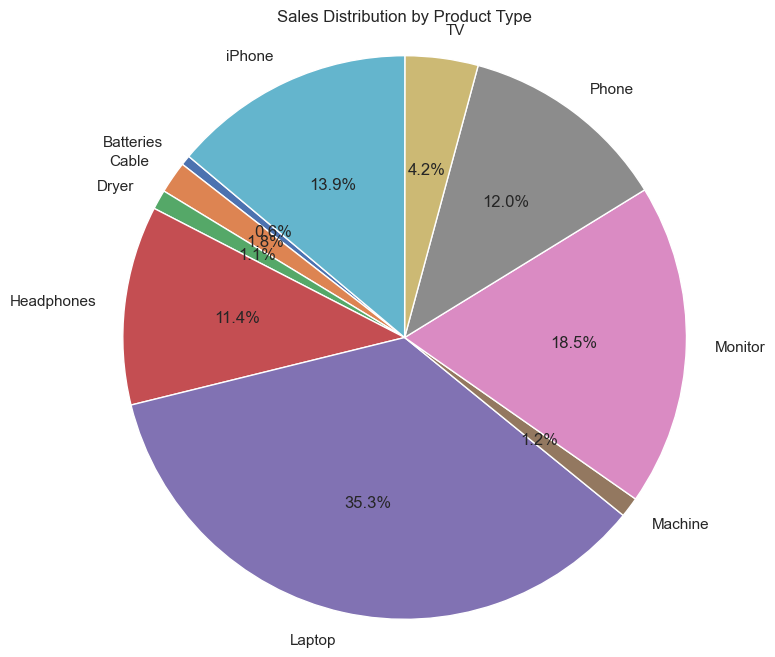

In [6]:
import matplotlib.pyplot as plt

# Group sales by Product Type
product_sales = df.groupby('Product Type')['Sales'].sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()